In [110]:
#1: IMPORE REQUIRED MODULES #

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [161]:
#2: IMPORT DATASET # 
data = pd.read_csv(r'D:\DATA ANALYST\PROJECTS\TOURISM WEBSITE ENGAGEMENT\Customer_behaviour_Tourism_TB-py_02.csv')

data.head()



,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,Preferred_device_Comp.vs.phone,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,preferred_location_type_numeric,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307,iOS and Android,2,38570,1,2,Financial,4,94,5993,8,1,11,0,1,0,8
1,1000002,0,367,iOS,2,9765,1,1,Financial,4,61,5130,1,0,23,1,4,1,10
2,1000003,1,277,iOS and Android,2,48055,1,2,Other,10,92,2090,6,1,15,0,2,0,7
3,1000004,0,247,iOS,2,48720,1,4,Financial,4,56,2909,1,1,11,0,3,0,8
4,1000005,0,202,iOS and Android,2,20685,1,1,Medical,8,40,3468,9,0,12,0,4,1,6


Text(0.5, 1.0, 'Scatter Plot of Taken_product vs Preferred_device_Comp.vs.phone')

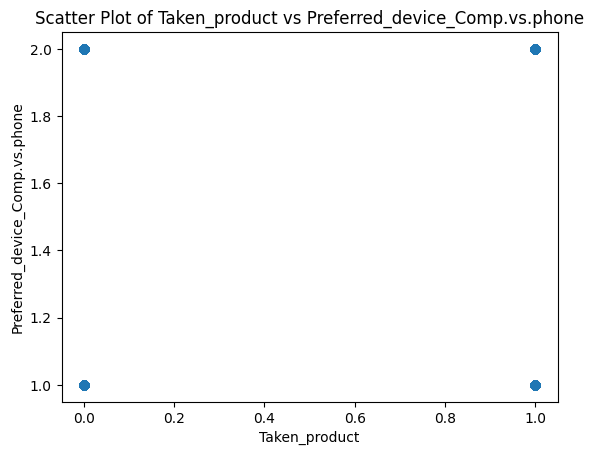

In [162]:
# VISUALIZE DATA ## CREATE SCATTERPLOR

plt.scatter(data['Taken_product'], data['Preferred_device_Comp.vs.phone']) 

# Add labels and a title
plt.xlabel('Taken_product')
plt.ylabel('Preferred_device_Comp.vs.phone')
plt.title('Scatter Plot of Taken_product vs Preferred_device_Comp.vs.phone')

In [ ]:
#

In [167]:
##SPLITTING THE DATASET INTO TRAINING AND TESTING SETS
from sklearn.model_selection import train_test_split

features = data[['Yearly_avg_view_on_travel_page', 'member_in_family', 'preferred_location_type_numeric', 'Yearly_avg_comment_on_travel_page', 
                  'following_company_page', 'montly_avg_comment_on_company_page', 'working_flag', 'Adult_flag','Daily_Avg_mins_spend_on_traveling_page']]
target = data['Taken_product']


# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6106, 9)
X_test shape: (2617, 9)
y_train shape: (6106,)
y_test shape: (2617,)


In [169]:
#PERFORM LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
# Increase the regularization strength
model = LogisticRegression(max_iter=10000)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# Make predictions
y_pred = log_reg.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)




coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Create a DataFrame to display the results
results = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients})

# Add intercept to the DataFrame
results.loc[len(results)] = ['Intercept', intercept]

# Display the results
print(results)

Accuracy: 0.8384

Confusion Matrix:
[[2107   61]
 [ 362   87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2168
           1       0.59      0.19      0.29       449

    accuracy                           0.84      2617
   macro avg       0.72      0.58      0.60      2617
weighted avg       0.81      0.84      0.80      2617

                                 Variable  Coefficient
0          Yearly_avg_view_on_travel_page    -0.005383
1                        member_in_family    -0.006721
2         preferred_location_type_numeric     0.004232
3       Yearly_avg_comment_on_travel_page     0.002183
4                  following_company_page     1.409907
5      montly_avg_comment_on_company_page     0.000043
6                            working_flag     0.022478
7                              Adult_flag    -1.140178
8  Daily_Avg_mins_spend_on_traveling_page    -0.031775
9                               Inte